In [ ]:
from __future__ import division
import csv
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7053k    0 7053k    0     0  1071k      0 --:--:--  0:00:06 --:--:-- 1160k

In [3]:
with open('turnstile_150627.txt') as f:    #open the link to the data
    reader = csv.reader(f)    #read in the data
    rows = [[cell.strip() for cell in row] for row in reader]    #loop over the rows and within the rows to extract the data and remove any whitespace from the beginning and end

In [4]:
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']    #check to make sure that we have the correct variable names

In [5]:
raw_readings = {}    #an empty dictionary
for row in rows:    #loop over the elements in the list rows
    raw_readings.setdefault(tuple(row[:4]), []).append(tuple(row[4:]))    #loop over the rows, add new keys to the dictionary when the row info is not already present, append to existing data when it is

In [6]:
type(raw_readings)

dict

In [7]:
practice = raw_readings[('J001', 'R460', '01-00-01', 'MARCY AVE')][0]
print(practice)

('JMZ', 'BMT', '06/20/2015', '01:00:00', 'REGULAR', '0007012983', '0001986648')


In [8]:
type(practice)

tuple

In [15]:
first1pair = {k: raw_readings.keys[k] for k in raw_readings.keys()[:2]}

TypeError: 'dict_keys' object is not subscriptable

In [7]:
raw_readings.keys()    #the dictionary raw_readings solves challenge 1

dict_keys([('R169', 'R168', '01-03-00', '96 ST'), ('N305', 'R017', '01-00-05', 'LEXINGTON-53 ST'), ('R523', 'R147', '00-00-06', '61 ST/WOODSIDE'), ('C018', 'R197', '00-00-01', '36 ST'), ('N030', 'R333', '00-00-00', '116 ST'), ('N196', 'R285', '00-03-01', 'FAR ROCKAWAY'), ('N307', 'R359', '00-06-00', 'COURT SQ-23 ST'), ('R610', 'R057', '00-06-00', 'BARCLAYS CENTER'), ('G015', 'R312', '01-06-01', 'W 8 ST-AQUARIUM'), ('B019', 'R149', '00-00-01', 'NEWKIRK PLAZA'), ('J001', 'R460', '01-00-01', 'MARCY AVE'), ('N187', 'R419', '00-00-01', 'ROCKAWAY PK 116'), ('H015', 'R250', '01-00-02', 'GRAND ST'), ('N080', 'R138', '00-00-00', 'W 4 ST-WASH SQ'), ('R515', 'R095', '00-03-00', 'DITMARS BL-31 S'), ('R417', 'R222', '00-03-04', 'E 177 ST-PARKCH'), ('R143', 'R032', '02-00-03', '42 ST-TIMES SQ'), ('R317', 'R408', '01-00-02', 'SIMPSON ST'), ('R625', 'R062', '01-00-02', 'CROWN HTS-UTICA'), ('B015', 'R098', '01-00-02', 'CHURCH AVE'), ('R113', 'R028', '01-04-00', 'FULTON ST'), ('R197', 'R117', '00-03-00'

In [9]:
datetime_cumulative = {turnstile: [(datetime.strptime(date + time,'%m/%d/%Y%X'),int(in_cumulative))
                                   for _, _, date, time,_, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings.items()}  #make a new dictionary; the keys will be the turnstiles, and each will have a list of tuples consisting of date and cumulative total

In [10]:
type(datetime_cumulative)

dict

In [11]:
practice2 = datetime_cumulative[('J001', 'R460', '01-00-01', 'MARCY AVE')][0]
print(practice2)


(datetime.datetime(2015, 6, 20, 1, 0), 7012983)


In [12]:
print(datetime_cumulative.values())[0].items()

dict_values([[(datetime.datetime(2015, 6, 20, 3, 0), 223688), (datetime.datetime(2015, 6, 20, 7, 0), 223690), (datetime.datetime(2015, 6, 20, 11, 0), 223698), (datetime.datetime(2015, 6, 20, 15, 0), 223711), (datetime.datetime(2015, 6, 20, 19, 0), 223731), (datetime.datetime(2015, 6, 20, 23, 0), 223740), (datetime.datetime(2015, 6, 21, 3, 0), 223742), (datetime.datetime(2015, 6, 21, 7, 0), 223742), (datetime.datetime(2015, 6, 21, 11, 0), 223746), (datetime.datetime(2015, 6, 21, 15, 0), 223752), (datetime.datetime(2015, 6, 21, 19, 0), 223767), (datetime.datetime(2015, 6, 21, 23, 0), 223778), (datetime.datetime(2015, 6, 22, 3, 0), 223784), (datetime.datetime(2015, 6, 22, 7, 0), 223787), (datetime.datetime(2015, 6, 22, 11, 0), 223845), (datetime.datetime(2015, 6, 22, 15, 0), 223944), (datetime.datetime(2015, 6, 22, 19, 0), 224325), (datetime.datetime(2015, 6, 22, 23, 0), 224354), (datetime.datetime(2015, 6, 23, 3, 0), 224358), (datetime.datetime(2015, 6, 23, 7, 0), 224358), (datetime.date

TypeError: 'NoneType' object is not subscriptable

In [13]:
for rows in datetime_cumulative.values():    #loop over the time series
    assert rows == sorted(rows)    #and ensure that each is in the correct order in time - note that tuples are sorted by first element

In [14]:
datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}    #make a new dictionary; keys will be the turnstiles, each will have a list of lists, each of which will give date, change in entries from last time, and elasped time

In [18]:
type(datetime_count_times)
      
practice3 = datetime_count_times[('J001', 'R460', '01-00-01', 'MARCY AVE')]
practice3

[[datetime.datetime(2015, 6, 20, 1, 0), 30, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 20, 5, 0), 75, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 20, 9, 0), 182, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 20, 13, 0), 199, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 20, 17, 0), 120, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 20, 21, 0), 79, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 21, 1, 0), 32, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 21, 5, 0), 52, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 21, 9, 0), 150, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 21, 13, 0), 199, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 21, 17, 0), 129, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 21, 21, 0), 56, datetime.timedelta(0, 14400)],
 [datetime.datetime(2015, 6, 22, 1, 0), 11, datetime.timedelta(0, 14400)],
 [datetime.da

In [79]:
datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}    #make one more dictionary; keys will be turnstiles, 
                                                                            #each will have a list of lists with date and change in entries

In [80]:

practice2 = datetime_counts[('J001', 'R460', '01-00-01', 'MARCY AVE')]
practice2    #the dictionary datetime_counts solves challenge 2

[(datetime.datetime(2015, 6, 20, 1, 0), 30),
 (datetime.datetime(2015, 6, 20, 5, 0), 75),
 (datetime.datetime(2015, 6, 20, 9, 0), 182),
 (datetime.datetime(2015, 6, 20, 13, 0), 199),
 (datetime.datetime(2015, 6, 20, 17, 0), 120),
 (datetime.datetime(2015, 6, 20, 21, 0), 79),
 (datetime.datetime(2015, 6, 21, 1, 0), 32),
 (datetime.datetime(2015, 6, 21, 5, 0), 52),
 (datetime.datetime(2015, 6, 21, 9, 0), 150),
 (datetime.datetime(2015, 6, 21, 13, 0), 199),
 (datetime.datetime(2015, 6, 21, 17, 0), 129),
 (datetime.datetime(2015, 6, 21, 21, 0), 56),
 (datetime.datetime(2015, 6, 22, 1, 0), 11),
 (datetime.datetime(2015, 6, 22, 5, 0), 413),
 (datetime.datetime(2015, 6, 22, 9, 0), 591),
 (datetime.datetime(2015, 6, 22, 13, 0), 340),
 (datetime.datetime(2015, 6, 22, 17, 0), 208),
 (datetime.datetime(2015, 6, 22, 21, 0), 75),
 (datetime.datetime(2015, 6, 23, 1, 0), 15),
 (datetime.datetime(2015, 6, 23, 5, 0), 394),
 (datetime.datetime(2015, 6, 23, 9, 0), 541),
 (datetime.datetime(2015, 6, 23, 1

In [4]:
day_counts = {}    #an empty dictionary to hold the total counts
for turnstile, rows in datetime_counts.items():    #loop over key/data pairs in datetime_counts
    by_day = {}    #for each make a new empty dictionary
    for time, count in rows:    #loop over the time and the count
        day = time.date()    #keep only the day info
        by_day[day] = by_day.get(day, 0) + count    #pull out the data associated with key <day> and add the count to it - if <day> is in the dictionary return 0
    day_counts[turnstile] = sorted(by_day.items())    #save the count by turnstile in the dictionary

NameError: name 'datetime_counts' is not defined

In [3]:
by_day.items()

NameError: name 'by_day' is not defined

In [2]:
day_counts[('J001', 'R460', '01-00-01', 'MARCY AVE')]  #the dictionary day_counts solves challenge 3

NameError: name 'day_counts' is not defined

In [64]:
%matplotlib inline

In [1]:
counts = []
dates = []
for item in day_counts.items():
    for date, count in rows:
        counts.append(count)
        dates.append(date)

plt.figure(figsize=(10,3))
plt.plot(dates,counts)
    

NameError: name 'day_counts' is not defined

In [108]:
by_station_day = {}
for station_info, value in day_counts.items():
    a = by_station_day.get((station_info[0], station_info[1], station_info[3]), [])
    a.extend(value)   
    by_station_day[(station_info[0], station_info[1], station_info[3])] = a

In [94]:
by_station_day[('J001', 'R460', 'MARCY AVE')]

[(datetime.date(2015, 6, 20), 0),
 (datetime.date(2015, 6, 21), 1),
 (datetime.date(2015, 6, 22), 0),
 (datetime.date(2015, 6, 23), 0),
 (datetime.date(2015, 6, 24), 1),
 (datetime.date(2015, 6, 25), 1),
 (datetime.date(2015, 6, 26), 2),
 (datetime.date(2015, 6, 20), 780),
 (datetime.date(2015, 6, 21), 708),
 (datetime.date(2015, 6, 22), 1920),
 (datetime.date(2015, 6, 23), 1898),
 (datetime.date(2015, 6, 24), 1948),
 (datetime.date(2015, 6, 25), 1942),
 (datetime.date(2015, 6, 26), 1764),
 (datetime.date(2015, 6, 20), 1021),
 (datetime.date(2015, 6, 21), 857),
 (datetime.date(2015, 6, 22), 2083),
 (datetime.date(2015, 6, 23), 2186),
 (datetime.date(2015, 6, 24), 2264),
 (datetime.date(2015, 6, 25), 2207),
 (datetime.date(2015, 6, 26), 1811),
 (datetime.date(2015, 6, 20), 685),
 (datetime.date(2015, 6, 21), 618),
 (datetime.date(2015, 6, 22), 1638),
 (datetime.date(2015, 6, 23), 1591),
 (datetime.date(2015, 6, 24), 1626),
 (datetime.date(2015, 6, 25), 1648),
 (datetime.date(2015, 6, 26

In [90]:
pd.DataFrame(list(by_station_day.items()))

0  \
0     (R237, R046, 42 ST-GRD CNTRL)   
1            (A066, R118, CANAL ST)   
2     (R210, R044, BROOKLYN BRIDGE)   
3              (D008, R392, 18 AVE)   
4          (R335, R444, NEREID AVE)   
5               (R169, R168, 96 ST)   
6              (R304, R206, 125 ST)   
7     (R619, R059, GRAND ARMY PLAZ)   
8        (R641, R210, BEVERLY ROAD)   
9          (N215, R237, 182-183 ST)   
10      (R521, R327, 52 ST-LINCOLN)   
11       (R634, R069, NEW LOTS AVE)   
12              (C026, R215, 86 ST)   
13     (R200A, R041, BOWLING GREEN)   
14     (R141, R031, 34 ST-PENN STA)   
15             (N550, R242, 18 AVE)   
16          (N400A, R359, COURT SQ)   
17    (R610, R057, BARCLAYS CENTER)   
18        (PTH07, R550, CITY / BUS)   
19   (N112A, R284, CLINTON-WASH AV)   
20             (N207, R104, 167 ST)   
21       (B014, R148, PARKSIDE AVE)   
22      (N501, R020, 47-50 ST-ROCK)   
23            (R534, R055, MAIN ST)   
24     (R125, R189, CHRISTOPHER ST)   
25    (R172, R192, 110 ST-CATHEDRL)   
26      (R336, R145, WAKEFIELD-241)   
27        (PTH21, R540, PATH WTC 2)   
28   (JFK03, R536, JFK JAMAICA CT1)   
29      (K019, R413, KNICKERBOCKER)   
..                              ...   
695   (R626, R062, CROWN HTS-UTICA)   
696             (H001, R175, 8 AVE)   
697      (N130, R383, HUDSON-80 ST)   
698       (A007, R079, 5 AVE-59 ST)   
699   (N335, R158, UNION TPK-KEW G)   
700         (R608, R056, NEVINS ST)   
701       (N125, R440, LIBERTY AVE)   
702        (B009, R411, PARK PLACE)   
703            (N010, R126, 175 ST)   
704        (N212, R253, 174-175 ST)   
705   (R514, R094, HOYT ST-ASTORIA)   
706            (R286, R309, 176 ST)   
707    (B024A, R211, KINGS HIGHWAY)   
708      (R329, R362, ALLERTON AVE)   
709            (R174, R034, 125 ST)   
710    (N224, R157, NORWOOD-205 ST)   
711             (E005, R247, 55 ST)   
712        (N535, R220, CARROLL ST)   
713        (R186, R036, DYCKMAN ST)   
714  (R210A, R044, BROOKLYN BRIDGE)   
715         (R330, R363, BURKE AVE)   
716     (N141, R356, LEFFERTS BLVD)   
717     (N203, R195, 161 ST-YANKEE)   
718            (R303, R324, 116 ST)   
719    (R145, R032, 42 ST-TIMES SQ)   
720    (N501A, R020, 47-50 ST-ROCK)   
721   (N504, R021, 42 ST-BRYANT PK)   
722          (R119, R320, CANAL ST)   
723      (H039, R375, NEW LOTS AVE)   
724     (N123B, R439, ROCKAWAY AVE)   

                                                     1  
0    [(2015-06-20, 1), (2015-06-21, 0), (2015-06-22...  
1    [(2015-06-20, 3551), (2015-06-21, 2976), (2015...  
2    [(2015-06-20, 16), (2015-06-21, 6), (2015-06-2...  
3    [(2015-06-20, 1679), (2015-06-21, 1369), (2015...  
4    [(2015-06-20, 901), (2015-06-21, 679), (2015-0...  
5    [(2015-06-20, 773), (2015-06-21, 571), (2015-0...  
6    [(2015-06-20, 1932), (2015-06-21, 1635), (2015...  
7    [(2015-06-20, 1397), (2015-06-21, 1050), (2015...  
8    [(2015-06-20, 1089), (2015-06-21, 875), (2015-...  
9    [(2015-06-20, 897), (2015-06-21, 723), (2015-0...  
10   [(2015-06-20, 314), (2015-06-21, 215), (2015-0...  
11   [(2015-06-20, 931), (2015-06-21, 768), (2015-0...  
12   [(2015-06-20, 465), (2015-06-21, 339), (2015-0...  
13   [(2015-06-20, 716), (2015-06-21, 564), (2015-0...  
14   [(2015-06-20, 2374), (2015-06-21, 1648), (2015...  
15   [(2015-06-20, 0), (2015-06-21, 0), (2015-06-22...  
16   [(2015-06-20, 444), (2015-06-21, 280), (2015-0...  
17   [(2015-06-20, 1596), (2015-06-21, 1342), (2015...  
18   [(2015-06-20, 1367), (2015-06-21, 742), (2015-...  
19   [(2015-06-20, 135), (2015-06-21, 131), (2015-0...  
20   [(2015-06-20, 1241), (2015-06-21, 968), (2015-...  
21   [(2015-06-20, 1489), (2015-06-21, 1356), (2015...  
22   [(2015-06-20, 670), (2015-06-21, 473), (2015-0...  
23   [(2015-06-20, 2453), (2015-06-21, 1737), (2015...  
24   [(2015-06-20, 1627), (2015-06-21, 1251), (2015...  
25   [(2015-06-20, 2380), (2015-06-21, 1915), (2015...  
26   [(2015-06-20, 662), (2015-06-21, 571), (2015-0...  
27   [(2015-06-20, 

In [88]:
s = pd.Series(by_station_day, name='DateValue').head()
s.index.name = 'station'
s.reset_index()

level_0 level_1        level_2  \
0    A002    R051  LEXINGTON AVE   
1    A006    R079    5 AVE-59 ST   
2    A007    R079    5 AVE-59 ST   
3    A010    R080    57 ST-7 AVE   
4    A011    R080    57 ST-7 AVE   

                                           DateValue  
0  [(2015-06-20, 1240), (2015-06-21, 948), (2015-...  
1  [(2015-06-20, 1242), (2015-06-21, 838), (2015-...  
2  [(2015-06-20, 0), (2015-06-21, 0), (2015-06-22...  
3  [(2015-06-20, 652), (2015-06-21, 536), (2015-0...  
4  [(2015-06-20, 833), (2015-06-21, 625), (2015-0...

In [100]:
def station_graph(station):
    counts = []
    dates = []
    for date, count in station:
        ts = pd.Series(counts.append(count),dates.append(date))
    ts.head()

                 
    plt.figure(figsize=(20,5))
    plt.plot(dates,counts)
    plt.show

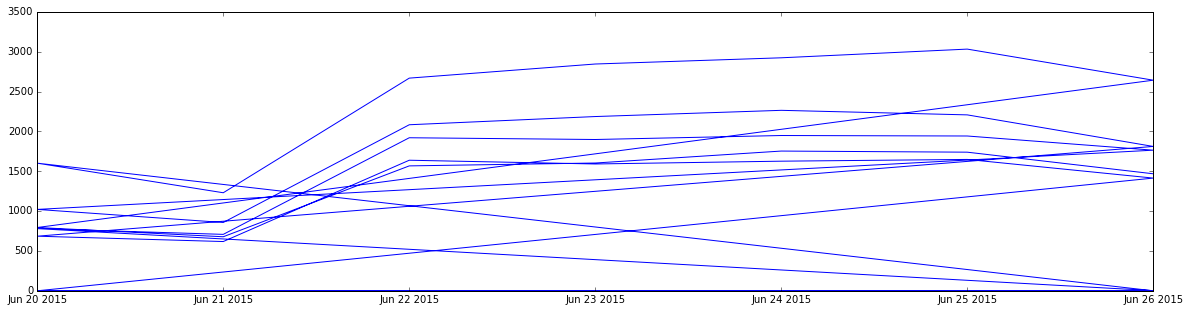

In [101]:
station_graph(by_station_day[('J001', 'R460', 'MARCY AVE')])